In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

%matplotlib inline
import numpy as np
from scipy.integrate import odeint
from scipy import *
from scipy.optimize import minimize
import copy
from sklearn import preprocessing

import numpy as np
import matplotlib.pyplot as plt

import emcee
import corner

from smt.sampling_methods import LHS

2.0.0


(200, 3)


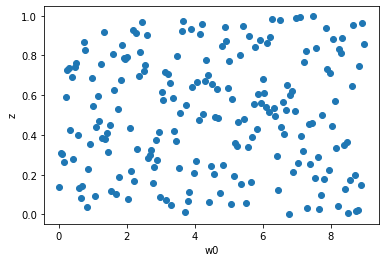

In [2]:
### STEP 1: 2 Latin Hypercube sampling
#xlimits = np.array([[0.0, 4.0], [0.0, 1.0], [0.0, 3.0]])
xlimits = np.array([[0.0, 9.0], [0.0, 1.0], [1.0, 5.0]]) #w0, z, z0 #change when desired
sampling = LHS(xlimits=xlimits)

num=1000

num_train = 800 
x_train = sampling(num_train)

num_test = 200 
x_test = sampling(num_test)

print(x_test.shape)

plt.plot(x_test[:, 0], x_test[:, 1], "o")
plt.xlabel("w0")
plt.ylabel("z")
plt.show()

In [3]:
### Step 2: Make DataFrame of inputs
df_train = pd.DataFrame(x_train)
df_train.columns = ['w0', 'z', 'y0']
print(df_train)

df_test = pd.DataFrame(x_test)
df_test.columns = ['w0', 'z', 'y0']
print(df_test)

           w0         z      y0
0    0.399375  0.404375  2.8025
1    3.965625  0.996875  1.4225
2    7.138125  0.838125  4.9725
3    1.141875  0.456875  2.1175
4    5.045625  0.159375  2.2275
..        ...       ...     ...
795  6.361875  0.690625  2.9675
796  2.626875  0.991875  4.0325
797  6.969375  0.470625  1.6575
798  8.499375  0.445625  1.8225
799  8.488125  0.959375  2.0575

[800 rows x 3 columns]
         w0       z    y0
0    8.2125  0.0425  4.07
1    8.2575  0.8325  1.69
2    7.9875  0.7125  4.95
3    5.2875  0.4675  2.89
4    3.8025  0.0675  2.71
..      ...     ...   ...
195  1.3275  0.9175  1.99
196  1.9125  0.7875  1.21
197  2.4075  0.8175  3.17
198  4.8825  0.9425  2.39
199  6.1425  0.8625  2.03

[200 rows x 3 columns]


In [4]:
### Step 3 Harmonic Oscillator Function, make DataFrame of outputs
def dy(y, t, w0, zeta):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x 

    return [dx, dp]

t = linspace(0, 10, 100)

output = pd.DataFrame(columns = ['0.1', '0.5', '1.0', '1.1', '1.5', '2.0', '2.5', '5.0', '6.0', '8.0'])
output_test = pd.DataFrame(columns = ['0.1', '0.5', '1.0', '1.1', '1.5', '2.0', '2.5', '5.0', '6.0', '8.0'])

for i in range(num_train): #num
    y2 = odeint(dy, [df_train.y0[i], 0], t, args=(df_train.w0[i], df_train.z[i]))
    #take value of y2 where t = .1 , .5, 1, 1.1, 1.5, 2, 2.5, 5, 6, 8
    output.loc[i] = [y2[:,0][1]] + [y2[:,0][5]] + [y2[:,0][10]] + [y2[:,0][11]] + [y2[:,0][15]] + [y2[:,0][20]] + [y2[:,0][25]] + [y2[:,0][50]] + [y2[:,0][60]] + [y2[:,0][80]]        
    
    
for i in range(num_test): #num
    y2_test = odeint(dy, [df_test.y0[i], 0], t, args=(df_test.w0[i], df_test.z[i]))
    #take value of y2 where t = .1 , .5, 1, 1.1, 1.5, 2, 2.5, 5, 6, 8
    output_test.loc[i] = [y2_test[:,0][1]] + [y2_test[:,0][5]] + [y2_test[:,0][10]] + [y2_test[:,0][11]] + [y2_test[:,0][15]] + [y2_test[:,0][20]] + [y2_test[:,0][25]] + [y2_test[:,0][50]] + [y2_test[:,0][60]] + [y2_test[:,0][80]]           

(100, 2)
(10,)
[[ 1.00000000e+00  0.00000000e+00]
 [ 8.28838244e-01 -3.21883662e+00]
 [ 3.99169800e-01 -4.99042615e+00]
 [-1.15357422e-01 -4.88567290e+00]
 [-5.32451049e-01 -3.15390988e+00]
 [-7.23313597e-01 -5.61810747e-01]
 [-6.49742666e-01  1.92285734e+00]
 [-3.66604799e-01  3.47884107e+00]
 [ 7.19450739e-03  3.69017678e+00]
 [ 3.35909636e-01  2.63946591e+00]
 [ 5.14415021e-01  8.23251854e-01]
 [ 4.99975542e-01 -1.06180577e+00]
 [ 3.19460534e-01 -2.37547887e+00]
 [ 5.23844777e-02 -2.74230315e+00]
 [-2.01776920e-01 -2.14730866e+00]
 [-3.59235880e-01 -8.99890051e-01]
 [-3.78209520e-01  5.07011631e-01]
 [-2.68141524e-01  1.58322571e+00]
 [-8.06863661e-02  2.00547029e+00]
 [ 1.12437426e-01  1.70675066e+00]
 [ 2.45796651e-01  8.69577456e-01]
 [ 2.81476437e-01 -1.63741132e-01]
 [ 2.18657994e-01 -1.02417305e+00]
 [ 8.96586122e-02 -1.44280997e+00]
 [-5.46922259e-02 -1.32964685e+00]
 [-1.64217567e-01 -7.83352933e-01]
 [-2.06151050e-01 -3.66338157e-02]
 [-1.74141378e-01  6.37133665e-01]
 [-8.

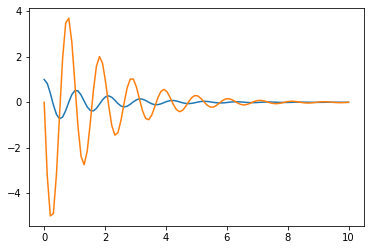

In [7]:
#..TRUE PARAMER VALS
w0_val = 6.0 #can change
z_val = 0.1 #can change
y0_val = 1.0 #can change

y_obs = odeint(dy, [y0_val, 0], t, args=(w0_val, z_val)) 
plt.plot(t,y_obs)
print(y_obs.shape)

yobs = np.r_[y_obs[1,0],y_obs[5,0],y_obs[10,0],y_obs[11,0],y_obs[15,0],
             y_obs[20,0],y_obs[25,0],y_obs[50,0],y_obs[60,0],y_obs[80,0]]

print(yobs.shape)
print(y_obs)

In [8]:
print(df_train)
print(df_test)
print(df_train.shape)
print(df_test.shape)
train_dataset = df_train
test_dataset = df_test
train_output = output
test_output = output_test

           w0         z      y0
0    0.399375  0.404375  2.8025
1    3.965625  0.996875  1.4225
2    7.138125  0.838125  4.9725
3    1.141875  0.456875  2.1175
4    5.045625  0.159375  2.2275
..        ...       ...     ...
795  6.361875  0.690625  2.9675
796  2.626875  0.991875  4.0325
797  6.969375  0.470625  1.6575
798  8.499375  0.445625  1.8225
799  8.488125  0.959375  2.0575

[800 rows x 3 columns]
         w0       z    y0
0    8.2125  0.0425  4.07
1    8.2575  0.8325  1.69
2    7.9875  0.7125  4.95
3    5.2875  0.4675  2.89
4    3.8025  0.0675  2.71
..      ...     ...   ...
195  1.3275  0.9175  1.99
196  1.9125  0.7875  1.21
197  2.4075  0.8175  3.17
198  4.8825  0.9425  2.39
199  6.1425  0.8625  2.03

[200 rows x 3 columns]
(800, 3)
(200, 3)


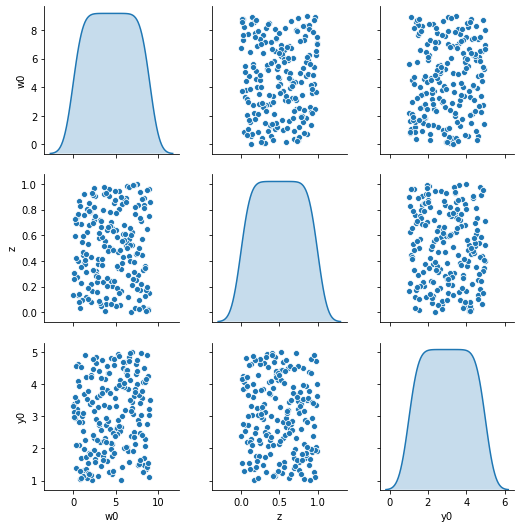

In [9]:
sns.pairplot(test_dataset[['w0', 'z', 'y0']], diag_kind="kde")

In [10]:
### Step 5: normalize/standardize input/output
def standard(x): #this is the standarization function for output
    return (x - np.array(train_stats_output['mean'])/ np.array(train_stats_output['std']))

#normalize the train dataset for parameters (generic)
def norm1(x):
    return (x - np.min(x))/(np.max(x)-np.min(x))

#normalize the train dataset for parameters 
def norm(x):
    return (x - np.array(np.min(train_dataset)))/(np.array(np.max(train_dataset))-
                                                  np.array(np.min(train_dataset)))

train_stats_output = train_output.describe()
train_stats_output = train_stats_output.transpose()
    
#parameters
normed_train_data = norm(np.array(train_dataset))
normed_test_data = norm(np.array(test_dataset))

#yobs norm

yobs = standard(np.array(yobs))

#output
std_train_data = standard(np.array(train_output))
std_test_data = standard(np.array(test_output))

In [12]:
#double check everything looks okay
print(normed_train_data)
print(train_dataset)
print(yobs)

[[0.04380476 0.40425532 0.4505632 ]
 [0.44055069 0.99749687 0.10513141]
 [0.79349186 0.83854819 0.99374218]
 ...
 [0.7747184  0.47058824 0.16395494]
 [0.94493116 0.44555695 0.20525657]
 [0.9436796  0.95994994 0.2640801 ]]
           w0         z      y0
0    0.399375  0.404375  2.8025
1    3.965625  0.996875  1.4225
2    7.138125  0.838125  4.9725
3    1.141875  0.456875  2.1175
4    5.045625  0.159375  2.2275
..        ...       ...     ...
795  6.361875  0.690625  2.9675
796  2.626875  0.991875  4.0325
797  6.969375  0.470625  1.6575
798  8.499375  0.445625  1.8225
799  8.488125  0.959375  2.0575

[800 rows x 3 columns]
[-1.67833401 -1.08202038  0.21257517  0.24933203 -0.57236346  0.06720758
 -0.35134946 -0.08036279 -0.08510926 -0.03899381]


In [13]:
### Step 6: Model Time
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[3]), #input_shape = # of params on first layer
    layers.Dense(64, activation='relu'), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(10) #this is marcus nobs
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [14]:
### Step 7: Build model
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 9,226
Trainable params: 9,226
Non-trainable params: 0
_________________________________________________________________


In [15]:
### Step 8: Model fit ### steps after this for lots of graphs

##just for progress bar
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
   
##
EPOCHS = 2000

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit( #para_nor, 
  normed_train_data, std_train_data,     #train_labels,
  epochs=EPOCHS, 
    #validation_split = 0.2,
    validation_data=[normed_test_data, std_test_data],
    verbose=0,
  callbacks=[PrintDot()])    


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

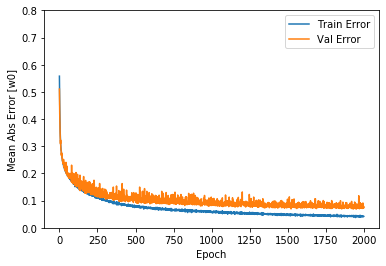

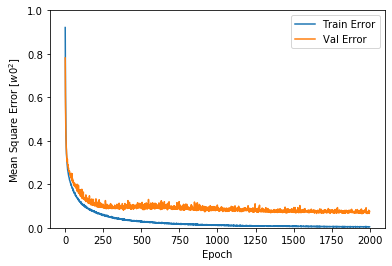

In [17]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [w0]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,.8])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$w0^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()

plot_history(history)

In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1995,0.004516,0.041125,0.004516,0.068977,0.076257,0.068977,1995
1996,0.004816,0.042014,0.004816,0.066068,0.072902,0.066068,1996
1997,0.004834,0.043478,0.004834,0.067269,0.072379,0.067269,1997
1998,0.004806,0.043216,0.004806,0.074880,0.079068,0.074880,1998
1999,0.004432,0.042033,0.004432,0.076002,0.074753,0.076002,1999


In [19]:
yerr = 0.1 #+ 0.02 * np.random.rand(N)
y = copy.deepcopy(y2[:,0])
print(yobs.shape)
print(y.shape)

(10,)
(100,)


In [20]:
def log_likelihood(x,y,yerr): 
    model_predictions = model.predict(np.array([x]))
    sigma2=yerr**2
    return -0.5 * np.sum((y - model_predictions.ravel()) ** 2 / sigma2 + np.log(sigma2))

def log_prior(x):
    if 0.0 < x[0] < 1.0 and 0.0 < x[1] < 1.0 and 0.0 < x[2] < 1.0: #noramlized here
        return 0.0
    return -np.inf

def log_probability(x, y, yerr):
    lp = log_prior(x)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(x, y, yerr)

In [21]:
w_samp = np.random.rand(32,1)*(1.)+0.
z_samp = np.random.rand(32,1)*(1.-0.)+0.
y_samp = np.random.rand(32,1)*(1.-0.)+0.
pos = np.hstack((w_samp,z_samp, y_samp))
print(pos.shape)

nwalkers, ndim = pos.shape

###to save
filename = "V2_2LHC_newparamX_norm.h5" #can change
backend = emcee.backends.HDFBackend(filename)
backend.reset(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(yobs,yerr), backend=backend)
sampler.run_mcmc(pos, 5000, progress=True); 

(32, 3)


100%|██████████| 5000/5000 [1:42:16<00:00,  1.23s/it]  


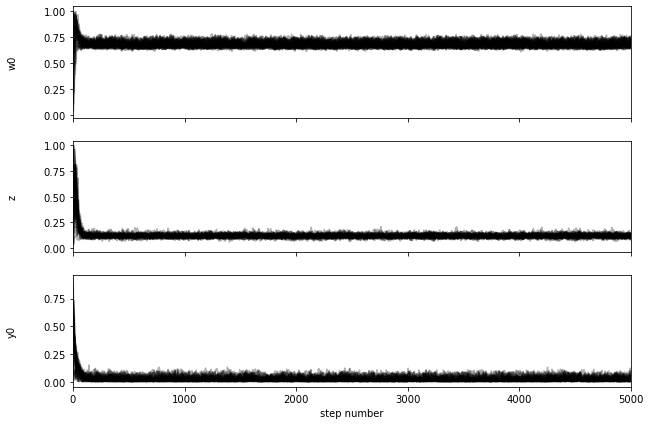

In [22]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["w0", "z", "y0"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [23]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)
print(flat_samples)

(10432, 3)
[[0.64900461 0.14184472 0.08480257]
 [0.70505655 0.11985279 0.04102354]
 [0.72471641 0.10031494 0.03724132]
 ...
 [0.73081601 0.09908901 0.00677541]
 [0.67390599 0.14778839 0.09519616]
 [0.71006185 0.10825632 0.02337767]]


In [ ]:
print(train_dataset[:])

In [24]:
def anti_norm(N, ogdataset):
    return (N*(np.max(ogdataset)-np.min(ogdataset))+np.min(ogdataset))

unnorm_samples = pd.DataFrame()

uno = (anti_norm(flat_samples[:,0],train_dataset['w0']))
dos = (anti_norm(flat_samples[:,1],train_dataset['z']))
tres = (anti_norm(flat_samples[:,2],train_dataset['y0']))

unnorm_samples['w0'] = uno
unnorm_samples['z']= dos
unnorm_samples['y0']= tres

print(unnorm_samples)

             w0         z        y0
0      5.839365  0.142292  1.341286
1      6.343202  0.120328  1.166389
2      6.519920  0.100815  1.151279
3      6.276655  0.114509  1.027736
4      5.810528  0.151686  1.280119
...         ...       ...       ...
10427  6.076229  0.134676  1.226452
10428  6.083319  0.111025  1.093591
10429  6.574747  0.099590  1.029568
10430  6.063197  0.148229  1.382809
10431  6.388193  0.108746  1.095894

[10432 rows x 3 columns]


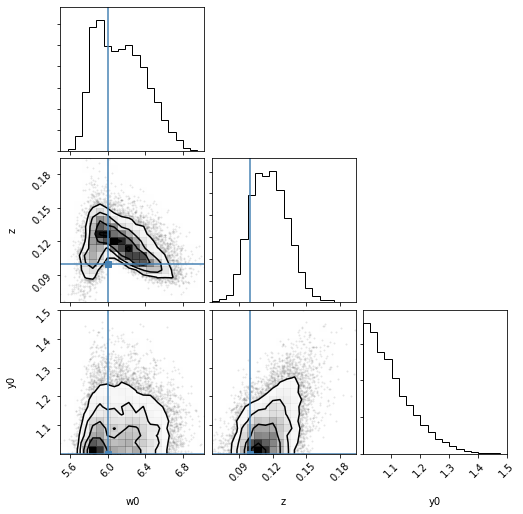

In [25]:
fig = corner.corner(
    unnorm_samples, truths=[w0_val, z_val, y0_val] 
);

In [ ]:
fig = corner.corner(flat_samples)